# Neural Network

In this notebook, we will be using PyTorch to build several simple neural networks to solve some of the problems tat we have seen in the previous notebooks.

In [69]:
import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
import torch
from sklearn.datasets import load_diabetes
from tools.utilities import plot_regression

In [177]:
def train(model, X, y, loss_fn, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if epoch % (epochs // 10) == 0:
            print(f'Epoch: {epoch}, Loss: {loss.item()}')

## Regression

In [178]:
X, y = load_diabetes(return_X_y=True)

In [179]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize a 2-layer neural network for regression.
        No activation function is used in the output layer.

        Args:
            input_size (num_features: int)
            hidden_size (int)
            output_size (int)
        """
        super(LinearRegressionModel, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        return x

We can see we are able to pass data through the model. Even though the output data is just random.

LinearRegressionModel(
  (linear1): Linear(in_features=10, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=1, bias=True)
)


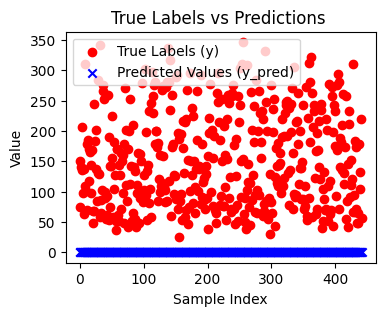

Epoch: 0, Loss: 28989.970703125
Epoch: 100, Loss: 6283.46240234375
Epoch: 200, Loss: 5929.95703125


/Users/henry/Git/ml-algorithms/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([442])) that is different to the input size (torch.Size([442, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 300, Loss: 5929.9541015625
Epoch: 400, Loss: 5929.95361328125
Epoch: 500, Loss: 5929.953125
Epoch: 600, Loss: 5929.95166015625
Epoch: 700, Loss: 5929.951171875
Epoch: 800, Loss: 5929.9501953125
Epoch: 900, Loss: 5929.94921875


In [180]:
model = LinearRegressionModel(input_size=10, hidden_size=256, output_size=1) # Note that the input_size should be equal to the num_features
print(model)

model(torch.Tensor(X)[:10]), torch.Tensor(y)[:10]
plot_regression(y=y, y_pred=model(torch.Tensor(X)).detach().numpy())

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

train(model, torch.Tensor(X), torch.Tensor(y), loss_fn, optimizer, epochs=1000)

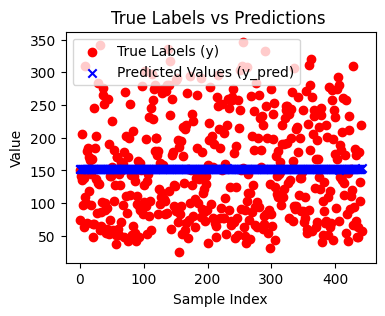

In [181]:
plot_regression(y=y, y_pred=model(torch.Tensor(X)).detach().numpy())

Let's now try to add some non-linear activation functions to the model.

In [182]:
class NonLinearRegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize a 2-layer neural network for regression.
        No activation function is used in the output layer.

        Args:
            input_size (num_features: int)
            hidden_size (int)
            output_size (int)
        """
        super(NonLinearRegressionModel, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.linear1(x))
        x = self.linear2(x)
        return x


In [183]:
model = NonLinearRegressionModel(input_size=10, hidden_size=256, output_size=1) # Note that the input_size should be equal to the num_features
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
print(model)
train(model, torch.Tensor(X), torch.Tensor(y), loss_fn, optimizer, epochs=3000)

Number of parameters: 3073
NonLinearRegressionModel(
  (linear1): Linear(in_features=10, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=1, bias=True)
)
Epoch: 0, Loss: 29077.896484375
Epoch: 300, Loss: 20915.8671875
Epoch: 600, Loss: 8773.2109375
Epoch: 900, Loss: 6008.5244140625
Epoch: 1200, Loss: 5930.18896484375
Epoch: 1500, Loss: 5929.884765625
Epoch: 1800, Loss: 5929.884765625
Epoch: 2100, Loss: 5929.884765625
Epoch: 2400, Loss: 5929.884765625
Epoch: 2700, Loss: 5929.884765625


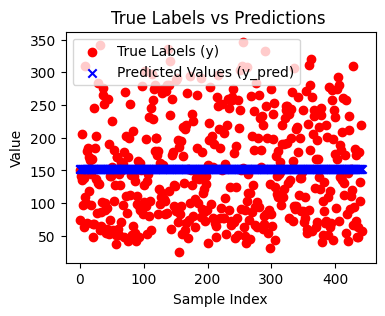

In [184]:
plot_regression(y=y, y_pred=model(torch.Tensor(X)).detach().numpy())